#Selección de características 
Se aplicarán técnicas de aprendizaje no supervisado a los Datasets transformados con el fin de seleccionar las características o variables adecuadas que servirán para posteriormente realizar predicciones por medio de modelos de aprendizaje supervisado.


# Setting Preliminares

Importar las librerías básicas 

In [ ]:
# carga de datos
import pandas as pd
import io
from google.colab import files

# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

# fechas
import datetime
import time



# Carga de Datos

Función de Google Colab para cargar datos.

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
#cargar
#europa_promedio_goles_fifa.csv
europa_promedio_goles = upload_files() 
europa_promedio_goles.head()

Saving europa_promedio_goles_fifa.csv to europa_promedio_goles_fifa.csv
User uploaded file "europa_promedio_goles_fifa.csv" with length 696898 bytes


,jornada,fecha,puntos_actuales,equipo,liga,entrenador_nuevo,promedio_goles_hechos_antes_de_cambio_entrenador_1_5,promedio_goles_hechos_despues_de_cambio_entrenador_1_5,promedio_goles_recibidos_antes_de_cambio_entrenador_1_5,promedio_goles_recibidos_despues_de_cambio_entrenador_1_5,...,puntos_hechos_despues_de_cambio_entrenador_1_5,porcentaje_victorias_despues_de_cambio_entrenador_1_5,porcentaje_victorias_antes_de_cambio_entrenador_1_5,porcentaje_empates_despues_de_cambio_entrenador_1_5,porcentaje_empates_antes_de_cambio_entrenador_1_5,porcentaje_derrotas_despues_de_cambio_entrenador_1_5,porcentaje_derrotas_antes_de_cambio_entrenador_1_5,ataque,medio,defensa
0,1,09-08-2009,1,SC Freiburg,bundesliga,Robin Dutt,1.4,0.8,2.8,2.4,...,4,0.2,0.0,0.2,0.2,0.6,0.8,69.0,69.0,69.0
1,1,06-08-2011,1,SC Freiburg,bundesliga,Marcus Sorg,0.6,1.8,1.8,3.2,...,4,0.2,0.2,0.2,0.0,0.6,0.8,69.0,69.0,69.0
2,18,21-01-2012,16,SC Freiburg,bundesliga,Christian Streich,1.0,1.2,2.4,1.6,...,5,0.2,0.0,0.4,0.6,0.4,0.4,69.0,69.0,69.0
3,1,26-08-2018,0,RB Leipzig,bundesliga,Ralf Rangnick,2.6,1.6,2.4,1.6,...,8,0.4,0.4,0.4,0.2,0.2,0.4,78.0,78.0,78.0
4,1,18-08-2019,3,RB Leipzig,bundesliga,Julian Nagelsmann,1.6,2.6,1.4,0.6,...,13,0.8,0.4,0.2,0.4,0.0,0.2,80.0,80.0,80.0


# Correlación entre variables (Europa Masculina)

El análisis de correlación nos permite observar las variables similares o que representan lo mismo, así podremos elegir entre algunas de ellas y no usarlas todas evitando la maldición de la dimensionalidad.

Eliminar columnas "entrenador_nuevo", "liga" y "equipo" ya que son variables no numericas

In [ ]:
filtered_df_europa=europa_promedio_goles.drop(["fecha","entrenador_nuevo",'liga',"equipo"],axis=1)
filtered_df_europa

,jornada,puntos_actuales,promedio_goles_hechos_antes_de_cambio_entrenador_1_5,promedio_goles_hechos_despues_de_cambio_entrenador_1_5,promedio_goles_recibidos_antes_de_cambio_entrenador_1_5,promedio_goles_recibidos_despues_de_cambio_entrenador_1_5,puntos_hechos_antes_de_cambio_entrenador_1_5,puntos_hechos_despues_de_cambio_entrenador_1_5,porcentaje_victorias_despues_de_cambio_entrenador_1_5,porcentaje_victorias_antes_de_cambio_entrenador_1_5,porcentaje_empates_despues_de_cambio_entrenador_1_5,porcentaje_empates_antes_de_cambio_entrenador_1_5,porcentaje_derrotas_despues_de_cambio_entrenador_1_5,porcentaje_derrotas_antes_de_cambio_entrenador_1_5,ataque,medio,defensa
0,1,1,1.4,0.800000,2.8,2.400000,1,4,0.2,0.0,0.2,0.2,0.6,0.8,69.0,69.0,69.0
1,1,1,0.6,1.800000,1.8,3.200000,3,4,0.2,0.2,0.2,0.0,0.6,0.8,69.0,69.0,69.0
2,18,16,1.0,1.200000,2.4,1.600000,3,5,0.2,0.0,0.4,0.6,0.4,0.4,69.0,69.0,69.0
3,1,0,2.6,1.600000,2.4,1.600000,7,8,0.4,0.4,0.4,0.2,0.2,0.4,78.0,78.0,78.0
4,1,3,1.6,2.600000,1.4,0.600000,8,13,0.8,0.4,0.2,0.4,0.0,0.2,80.0,80.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6020,32,28,0.8,0.800000,1.2,2.400000,4,3,0.2,0.2,0.0,0.2,0.8,0.6,71.0,71.0,71.0
6021,1,3,0.2,1.200000,2.4,0.800000,0,8,0.4,0.0,0.4,0.0,0.2,1.0,71.0,71.0,71.0
6022,23,17,0.6,1.200000,2.2,1.200000,1,7,0.4,0.0,0.2,0.2,0.4,0.8,73.0,73.0,73.0
6023,31,24,0.8,0.666667,1.8,2.333333,4,0,0.0,0.2,0.0,0.2,1.0,0.6,73.0,73.0,73.0


Transponer el dataframe para aplicar tecnicas de aprendizaje no supervisado con el fin de seleccionar caracteristicas.

In [ ]:
df_feat_europa = transpose(filtered_df_europa)

In [ ]:
names =  df_feat_europa.index
names

Index(['jornada', 'puntos_actuales',
       'promedio_goles_hechos_antes_de_cambio_entrenador_1_5',
       'promedio_goles_hechos_despues_de_cambio_entrenador_1_5',
       'promedio_goles_recibidos_antes_de_cambio_entrenador_1_5',
       'promedio_goles_recibidos_despues_de_cambio_entrenador_1_5',
       'puntos_hechos_antes_de_cambio_entrenador_1_5',
       'puntos_hechos_despues_de_cambio_entrenador_1_5',
       'porcentaje_victorias_despues_de_cambio_entrenador_1_5',
       'porcentaje_victorias_antes_de_cambio_entrenador_1_5',
       'porcentaje_empates_despues_de_cambio_entrenador_1_5',
       'porcentaje_empates_antes_de_cambio_entrenador_1_5',
       'porcentaje_derrotas_despues_de_cambio_entrenador_1_5',
       'porcentaje_derrotas_antes_de_cambio_entrenador_1_5', 'ataque', 'medio',
       'defensa'],
      dtype='object')

Se utiliza la funcion "corrcoef" para visualizar la correlación entre variables.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


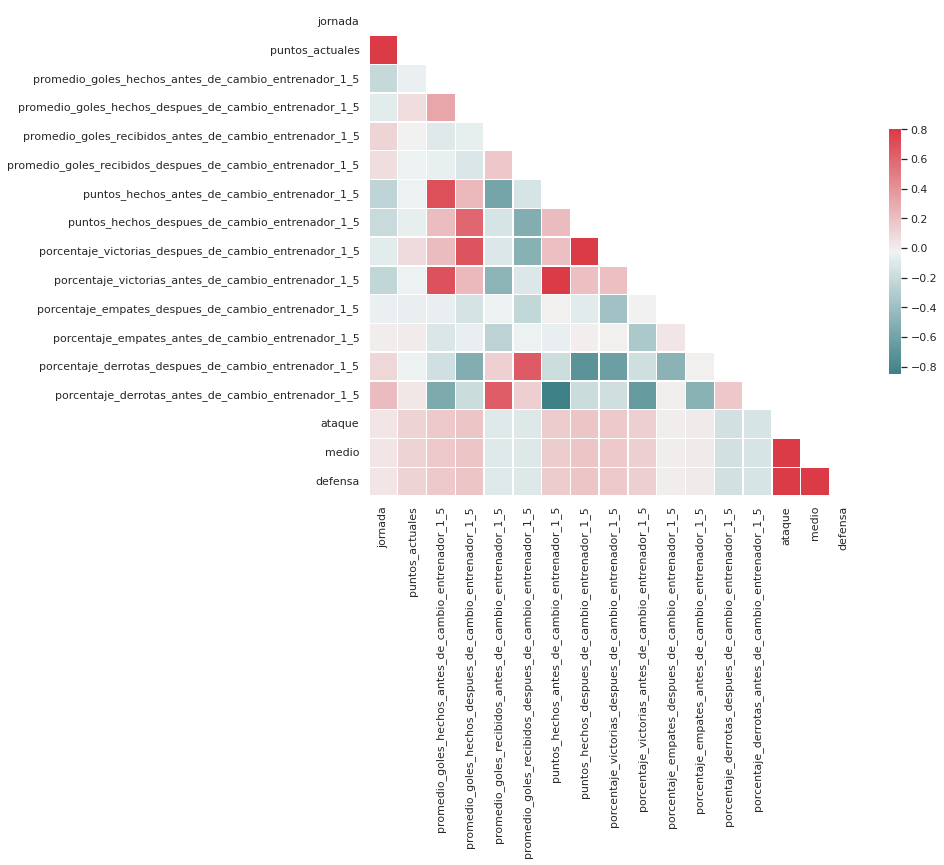

In [ ]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = corrcoef(df_feat_europa)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Podemos visualizar que existen algunas variables relacionadas como “puntos_actuales” y “jornada”, o las variables “puntos _hechos_antes_de_cambio_entrenador_1_5” y “promedio_goles_hechos_antes_de_cambio_entrenador_1_5”,  de igual forma las variables “porcentaje_de_victorias_antes_de_cambio_entrenador_1_5” y “promedio_goles_hechos_antes_de_cambio_entrenador_1_5”.

# Análisis de componentes principales

Para obtener una mayor visión de las variables aplicaremos una PCA con el fin de ver las variables en una representación 2D.


Primero normalizamos los datos entre 0 y 1 para evitar que algunas variables con números muy grandes tengan mayor impacto, de esta manera todas las variables quedan en la misma escala.

In [ ]:
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
features_norm_europa = min_max_scaler.fit_transform(df_feat_europa)

In [ ]:
features_norm_europa

array([[0.01449275, 0.01449275, 0.26086957, ..., 0.31506849, 0.42465753,
        0.46575342],
       [0.01449275, 0.01449275, 0.23188406, ..., 0.23287671, 0.32876712,
        0.34246575],
       [0.02028986, 0.00869565, 0.01449275, ..., 0.00821918, 0.0109589 ,
        0.00547945],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
features_norm_europa.min(axis=0)

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
features_norm_europa.max(axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

Aplicamos la PCA con 2 componentes y observaremos cuanta de la varianza se explica.

Variance Ratio:  [0.97774139 0.01939023]


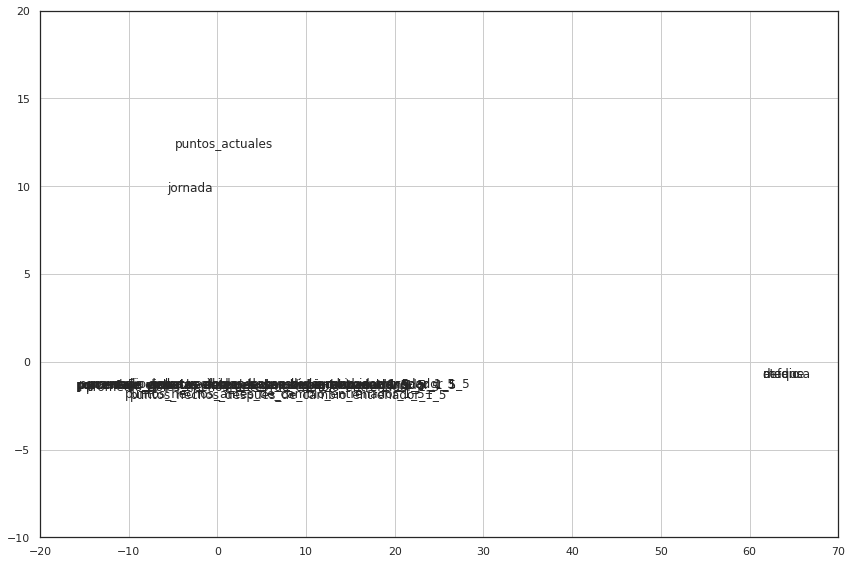

In [ ]:
# Principal Component Analysis, 
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm_europa)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 


import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i])#[0:15], cambiar número de letras


plt.xlim(-20, 70)
plt.ylim(-10, 20)
ax.grid(True)
fig.tight_layout()
plt.show()

El ratio de variabilidad por eje es muy bueno ya que representa el 97% de la variabilidad del conjunto de datos en el eje X.

En la visualización en 2D podemos observar cómo se agrupan algunas variables por ejemplo en la parte inferior derecha de la grafica se encuentran muy cercanas las variables “jornada” y “puntos_actuales”, y en la parte superior se encuentran las variables “puntos_hechos_antes_de_cambio_entrenador” y “puntos_hechos_despues_cambio_entrenador”. 

# Clustering jerárquico (Europa)

El clustering jerárquico nos será de utilidad para observar las agrupaciones de las variables, cada agrupación indicara que las variables en el son similares e incluso se podríamos considerar tomar una variable por grupo

Ahora procedemos a construir el dendrograma con el método “Single” el cual selecciona entre los grupos el valor mas cercano para realizar el agrupamiento, esto permite detectar Outliers, en este caso los Outliers son variables que están alejadas de los cúmulos de variables, indicando que son diferentes.

In [ ]:
#http://docs.scipy.org/doc/scipy/reference/cluster.html
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm_europa)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


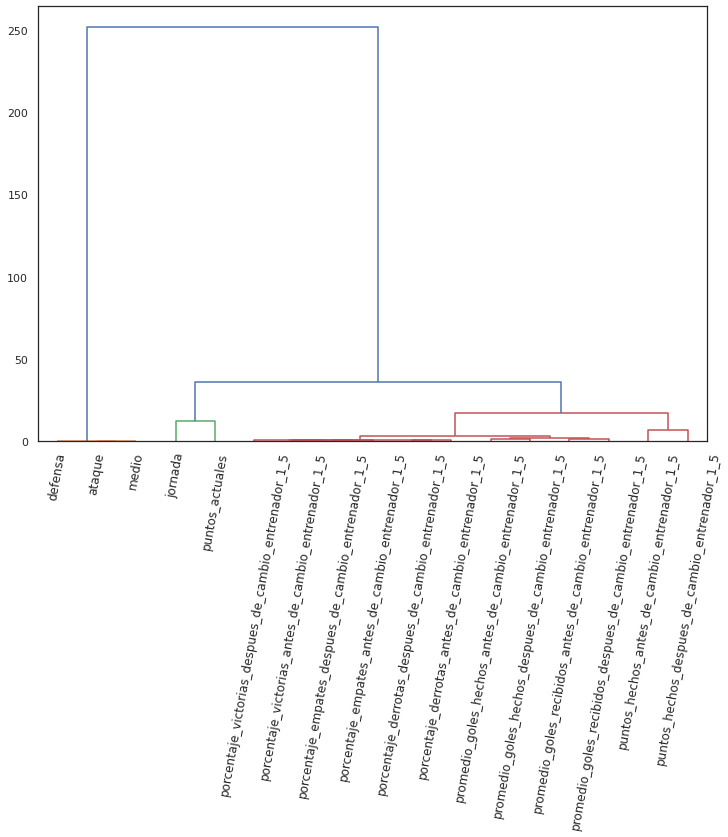

In [ ]:
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
clusters = cluster.hierarchy.linkage(matdist, method = 'single')
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
cluster.hierarchy.dendrogram(clusters, color_threshold = 30, labels = names , leaf_rotation=80)
plt.show()

Vamos a obtener la asignación de grupos de cada uno de ellos, al cortar en 20 obtenemos 7 grupos.

In [ ]:
cut = 30 # !!!! ad-hoc
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1], dtype=int32)

Ahora podemos ver con colores la asignación de grupo.

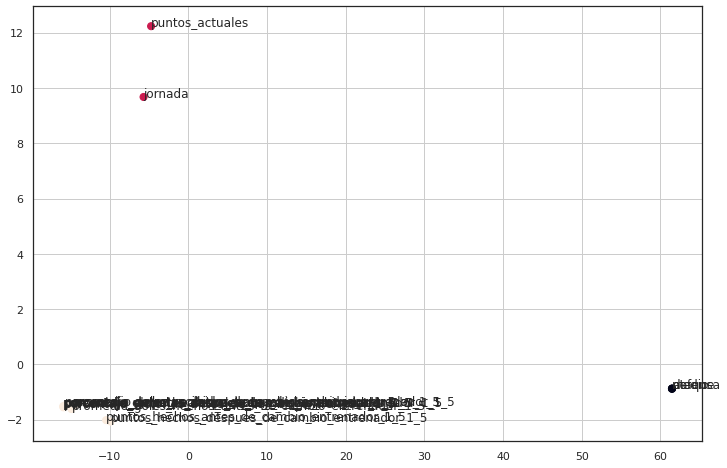

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) #[0:3]

plt.grid()
plt.show()

Como pudimos observar los 3 Dataframe poseen varias similitudes entre sus respectivas variables, por lo tanto, es posible utilizar seleccionar las mismas variables para elaborar un método de aprendizaje supervisado. En este caso teniendo en cuenta los grupos obtenidos por la matriz de correlaciones, el Clustering jerarjico y la PCA con dos dimensiones, se seleccionan las siguientes variables.

Ya que existen variables que se encuentran muy cercanas, dependiendo de la variable objetivo que se desee predecir, se puede escoger una u otra variable del mismo grupo, 

Para el caso de predicción de puntos después de cambio de entrenador se pueden seleccionar las variables:

In [ ]:
#caso #1
selected_features = ['jornada','puntos_actuales','porcentaje_victorias_antes_de_cambio_entrenador_1_5','puntos_hechos_antes_de_cambio_entrenador_1_5']

Para el caso de predicción de goles hechos despues de cambio de entrenador se pueden seleccionar las variables:

In [ ]:
#caso #2
selected_features = ['jornada','puntos_actuales','promedio_goles_hechos_antes_de_cambio_entrenador_1_5','ataque']
